In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
import matplotlib.pylab as pl
from itertools import cycle
import matplotlib.gridspec as gridspec
import glob
import collections
import math
import re
import os
from collections import defaultdict

This notebook is used to plot all the shannon data for the bftt species comp runs.

Need to combine all the individual processed csv files into a dictionary.

In [2]:
g_max = 0.083
nRuns = 100
# phase2_bigK_filepath = "species_comp_calculations/phase2_data/shannon_calculations_precisest_bigK_phase2_runID-"
# phase4_bigK_filepath = "species_comp_calculations/phase4_data/shannon_calculations_precisest_bigK_phase4_runID-"

# phase2_bigK_filepath_EDGE = "species_comp_calculations/phase2_data_EDGE/shannon_calculations_precisest_bigK_phase2_runID-"
# phase4_bigK_filepath_EDGE = "species_comp_calculations/phase4_data_EDGE/shannon_calculations_precisest_bigK_phase4_runID-"

#these are for the varying immigration runs
phase2_bigK_filepath = "species_comp_calculations_varying_immigration/phase2_data/shannon_calculations_precisest_bigK_phase2_runID-"
phase4_bigK_filepath = "species_comp_calculations_varying_immigration/phase4_data/shannon_calculations_precisest_bigK_phase4_runID-"

phase2_bigK_filepath_EDGE = "species_comp_calculations_varying_immigration/phase2_data_EDGE/shannon_calculations_precisest_bigK_phase2_runID-"
phase4_bigK_filepath_EDGE = "species_comp_calculations_varying_immigration/phase4_data_EDGE/shannon_calculations_precisest_bigK_phase4_runID-"


In [3]:
def combineShannonDataIntoDict(filepath, nRuns):
    '''
    This iterates over all the csv files of the processed shannon data and collates them into a dictionary.
    
    The keys to this dictionary are the runIDs, the values in this dictionary are dataframes of the shannon data over time
    '''
    
    shannon_dict = {}
    
    for runID in range(nRuns):
        '''added this in because there were some issues with run id 74 in the varing imm reading in files'''
        if runID != 74: shannon_dict["runID_"+str(runID)] = pd.read_csv(filepath+str(runID)+".csv")
        
    return shannon_dict

In [4]:
def getAveragedShannonVals(shannon_data):
    '''
    this method collates all the shannon data over all the runs and averages them
    '''
    time_df = pd.DataFrame() #time
    nBac_df = pd.DataFrame() #no. of bacteria over time
    H_df = pd.DataFrame() #shannon index over time
    E_df = pd.DataFrame() #shannon equitability over time
    S_df = pd.DataFrame() #no. of species over time
    
    for runID in shannon_data.keys():
        time_df[runID] = shannon_data[runID]["t"]
        nBac_df[runID] = shannon_data[runID]["nBac"]
        H_df[runID] = shannon_data[runID]["H"]
        E_df[runID] = shannon_data[runID]["E"]
        S_df[runID] = shannon_data[runID]["S"]
        
    t_avg = time_df.mean(axis=1)
    nBac_avg = nBac_df.mean(axis=1)
    H_avg = H_df.mean(axis=1)
    E_avg = E_df.mean(axis=1)
    S_avg = S_df.mean(axis=1)
    
    return np.array(t_avg), np.array(nBac_avg), np.array(H_avg), np.array(E_avg), np.array(S_avg)

In [5]:
phase2_shannon_dict = combineShannonDataIntoDict(phase2_bigK_filepath, nRuns)
phase4_shannon_dict = combineShannonDataIntoDict(phase4_bigK_filepath, nRuns)

phase2_shannon_dict_EDGE = combineShannonDataIntoDict(phase2_bigK_filepath_EDGE, nRuns)
phase4_shannon_dict_EDGE = combineShannonDataIntoDict(phase4_bigK_filepath_EDGE, nRuns)

In [6]:
#phase4_shannon_dict['runID_1']

In [7]:
t_p2, nBac_p2, H_p2, E_p2, S_p2 = getAveragedShannonVals(phase2_shannon_dict)
t_p4, nBac_p4, H_p4, E_p4, S_p4 = getAveragedShannonVals(phase4_shannon_dict)

t_p2_EDGE, nBac_p2_EDGE, H_p2_EDGE, E_p2_EDGE, S_p2_EDGE = getAveragedShannonVals(phase2_shannon_dict_EDGE)
t_p4_EDGE, nBac_p4_EDGE, H_p4_EDGE, E_p4_EDGE, S_p4_EDGE = getAveragedShannonVals(phase4_shannon_dict_EDGE)

In [12]:
def plotPhaseComparisons(x_p2, y_p2, x_p4, y_p4, x_label, y_label, title_string, filename, time_bool=False):
    plt.figure(figsize=(8,6))
    
    p2_color = "#00b359"
    p4_color = "#b800e6"
    line_width = 6.
    p4_line_style = "--"
    #skip the first value as it's t=0 so there's only like 1 bacteria in there
    if time_bool:
        plt.plot(x_p2[x_p2 <=70.][1:]*g_max, y_p2[x_p2 <=70.][1:], label="$\\frac{r_{\\rm im}}{Kr_{\\rm det}} > 1$", lw=line_width, color=p2_color)
        plt.plot(x_p4[x_p4 <=70.][1:]*g_max, y_p4[x_p4 <=70.][1:], label="$\\frac{r_{\\rm im}}{Kr_{\\rm det}} < 1$", lw=line_width, color=p4_color, ls=p4_line_style)

    else:
        plt.plot(x_p2[1:], y_p2[1:], label="$\\frac{r_{\\rm im}}{Kr_{\\rm det}} > 1$", lw=line_width, color=p2_color)
        plt.plot(x_p4[1:], y_p4[1:], label="$\\frac{r_{\\rm im}}{Kr_{\\rm det}} < 1$", lw=line_width, color=p4_color, ls=p4_line_style)
        
        
    plt.xlabel(x_label, fontsize=18)
    plt.ylabel(y_label, fontsize=18)
    plt.title(title_string, fontsize=20)
    #plt.semilogy()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=16)
    plt.locator_params(axis='x', nbins=4)
    #plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    #plt.locator_params(axis='y', nbins=6)
    plt.savefig("species_comp_plots/"+filename, bbox_inches="tight")
    plt.show()

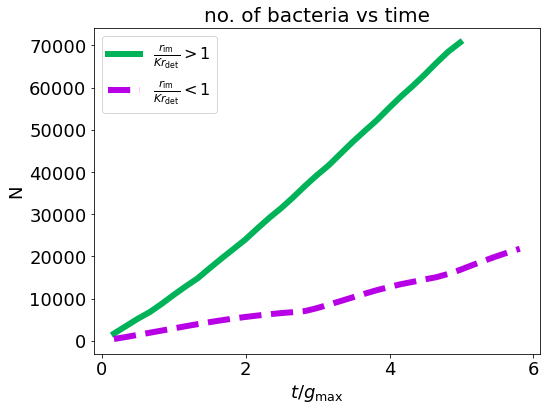

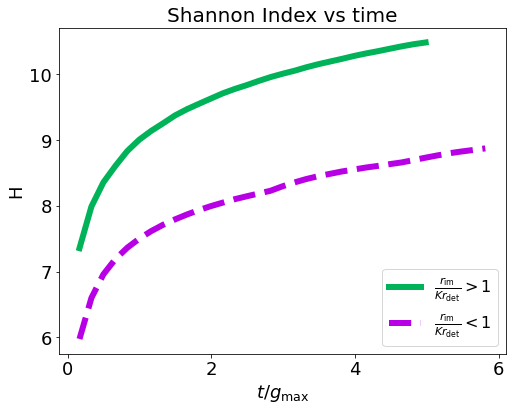

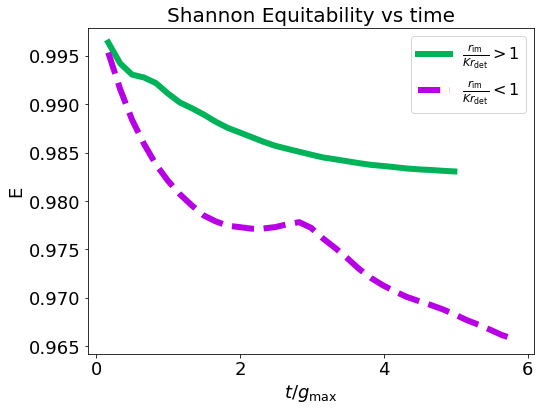

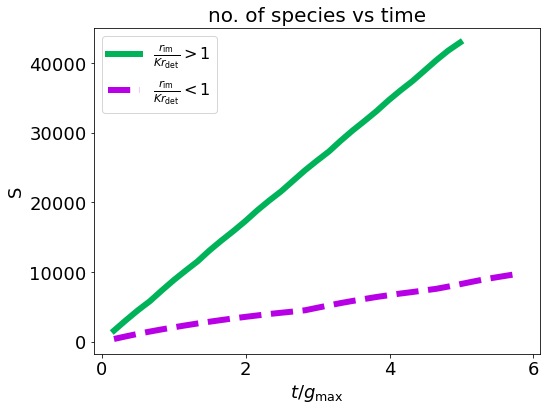

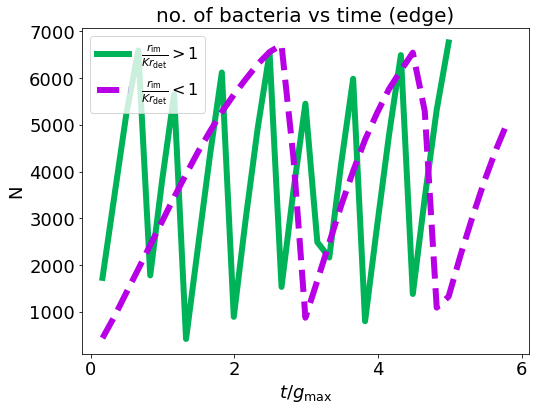

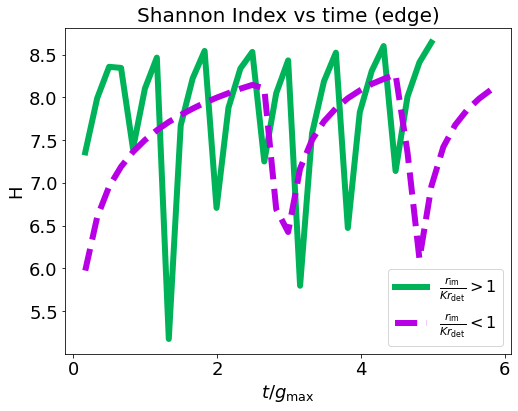

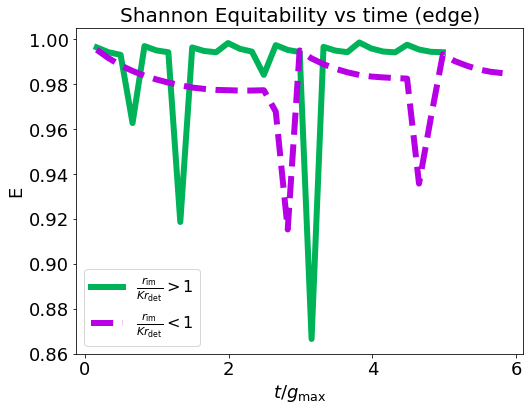

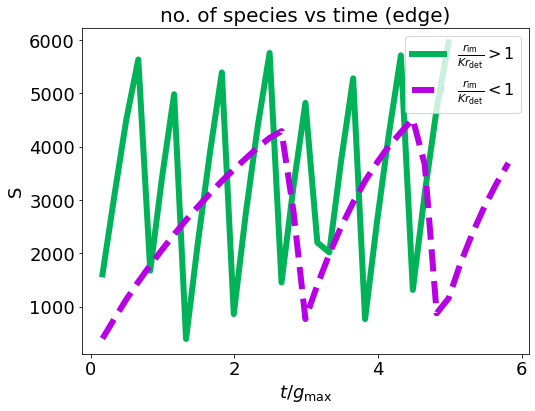

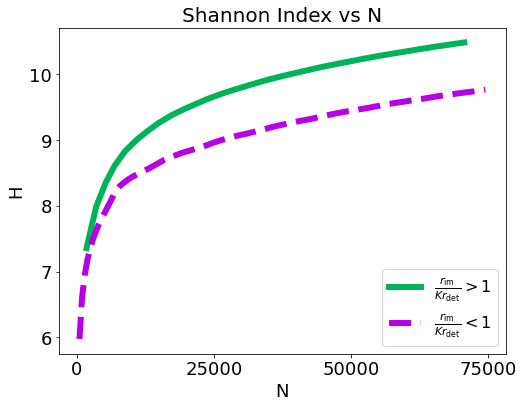

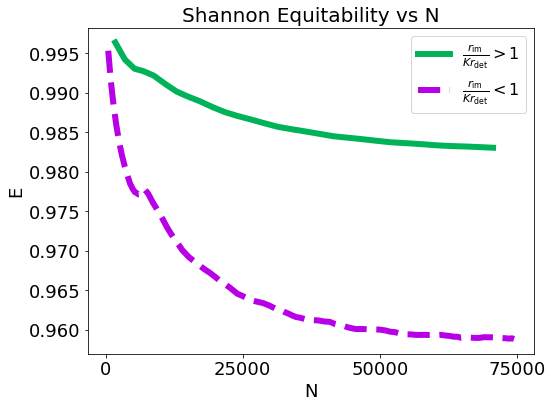

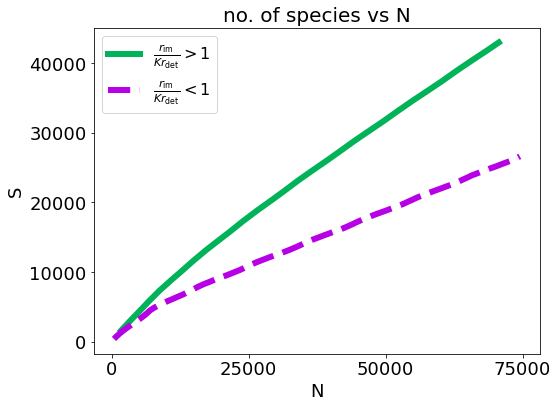

In [13]:
#shannon over time plots
plotPhaseComparisons(t_p2, nBac_p2, t_p4, nBac_p4, "$t/g_{\max}$", "N", "no. of bacteria vs time", "N_vs_t_varyingImm.pdf", True)
plotPhaseComparisons(t_p2, H_p2, t_p4, H_p4, "$t/g_{\max}$", "H", "Shannon Index vs time", "H_vs_t_varyingImm.pdf", True)
plotPhaseComparisons(t_p2, E_p2, t_p4, E_p4, "$t/g_{\max}$", "E", "Shannon Equitability vs time", "E_vs_t_varyingImm.pdf", True)
plotPhaseComparisons(t_p2, S_p2, t_p4, S_p4, "$t/g_{\max}$", "S", "no. of species vs time", "S_vs_t_varyingImm.pdf", True)

#shannon over time plots - edge
plotPhaseComparisons(t_p2_EDGE, nBac_p2_EDGE, t_p4_EDGE, nBac_p4_EDGE, "$t/g_{\max}$", "N", "no. of bacteria vs time (edge)", "N_vs_t_EDGE_varyingImm.pdf", True)
plotPhaseComparisons(t_p2_EDGE, H_p2_EDGE, t_p4_EDGE, H_p4_EDGE, "$t/g_{\max}$", "H", "Shannon Index vs time (edge)", "H_vs_t_EDGE_varyingImm.pdf", True)
plotPhaseComparisons(t_p2_EDGE, E_p2_EDGE, t_p4_EDGE, E_p4_EDGE, "$t/g_{\max}$", "E", "Shannon Equitability vs time (edge)", "E_vs_t_EDGE_varyingImm.pdf", True)
plotPhaseComparisons(t_p2_EDGE, S_p2_EDGE, t_p4_EDGE, S_p4_EDGE, "$t/g_{\max}$", "S", "no. of species vs time (edge)", "S_vs_t_EDGE_varyingImm.pdf", True)

#shannon over N plots
plotPhaseComparisons(nBac_p2, H_p2, nBac_p4, H_p4, "N", "H", "Shannon Index vs N", "H_vs_N_varyingImm.pdf")
plotPhaseComparisons(nBac_p2, E_p2, nBac_p4, E_p4, "N", "E", "Shannon Equitability vs N", "E_vs_N_varyingImm.pdf")
plotPhaseComparisons(nBac_p2, S_p2, nBac_p4, S_p4, "N", "S", "no. of species vs N", "S_vs_N_varyingImm.pdf")

#shannon over N plots - edge
# plotPhaseComparisons(nBac_p2_EDGE, H_p2_EDGE, nBac_p4_EDGE, H_p4_EDGE, "N", "H", "Shannon Index vs N (edge)", "H_vs_N_EDGE.pdf")
# plotPhaseComparisons(nBac_p2_EDGE, E_p2_EDGE, nBac_p4_EDGE, E_p4_EDGE, "N", "E", "Shannon Equitability vs N (edge)", "E_vs_N_EDGE.pdf")
# plotPhaseComparisons(nBac_p2_EDGE, S_p2_EDGE, nBac_p4_EDGE, S_p4_EDGE, "N", "S", "no. of species vs N (edge)", "S_vs_N_EDGE.pdf")